# Finger Excercise #4 

In [2]:
# Finger4.1.ipynb
# version con rolling hash
# Ignacio Giss

import matplotlib.pyplot as plot
import matplotlib.cm as cm
import matplotlib.colors
import numpy


%matplotlib inline


In [3]:
consBase = 257
consMax = 1000000007

def rhash0(iniStr):
    rhashIni = 0
    for i in range(len(iniStr)):
        rhashIni = rhashIni*consBase + ord(iniStr[i])
        rhashIni %= consMax
    return rhashIni


def hashing_rk(lengr, haystack, dicrh):    
    rhash = 0
    
    actPow = 1
    for i in range(lengr):
        actPow = (actPow * consBase) % consMax    

    for pos in range(len(haystack)):
        rhash = rhash*consBase + ord(haystack[pos])
        rhash %= consMax
        
        if (pos >= lengr):
            rhash -= actPow * ord(haystack[pos - lengr]) % consMax
            if (rhash < 0):
                rhash += consMax       
        
        if dicrh.has_key(rhash) and (pos >= lengr-1):             
            dicrh[rhash].append((abs(pos - dicrh[rhash][0][0]), lengr))
        else:
            dicrh[rhash] = [(pos, lengr)] 
    
    return -1;

def countRepetitions(fileIn, bufferSize=25):
    text=fileIn.read().replace('\n', '')    
    dicrh = {}    
    for lengr in range(2, bufferSize):
                    
        hashing_rk(lengr, text, dicrh)
        
    return dicrh    


In [4]:
def graph(dataDic, alphav=0.1):    
    
    plot.figure(figsize=(25,6))
    ax = plot.subplot(111)
    xData = []
    yData = []
    for key in dataDic:
        for elem in range(1, len(dataDic[key])):
            xData.append(dataDic[key][elem][0])
            yData.append(dataDic[key][elem][1])
    
            
    rcol = numpy.arange(len(yData))
    plot.scatter(xData, yData, edgecolors='none', c=yData, alpha = alphav, s=65)
       
    plot.xlabel('distancia')
    plot.ylabel('longitud')
    plot.colorbar()
    plot.axis('auto')
    ax.set_xlim(xmin=0)
    ax.set_ylim(ymin=0)
    
    plot.show()

## Shakespeare

In [ ]:
# 5.205.583 caracteres, 122.449 lineas
text1 = open("shakespeare.txt")
dataTxt1 = countRepetitions(text1)
graph(dataTxt1, 0.03)

## David Bohm - La Totalidad y el Orden Implicado

In [1]:
# 593.989 caracteres, 9.471 lineas
text2 = open("David Bohm - La Totalidad y el Orden Implicado.txt")
dataTxt2 = countRepetitions(text2, 50)
graph(dataTxt2, 0.1, 50)

NameError: name 'countRepetitions' is not defined

## Jorge Luis Borges - El Aleph

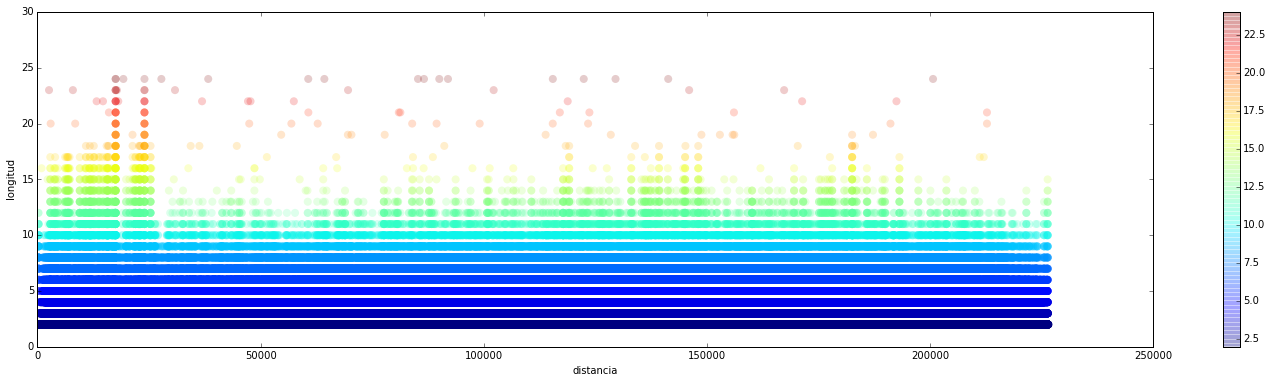

In [6]:
# 226.479 caracteres, 3.473 lineas
text3 = open("Jorge Luis Borges - El Aleph.txt")
dataTxt3 = countRepetitions(text3)
graph(dataTxt3, 0.2)

## Código C++

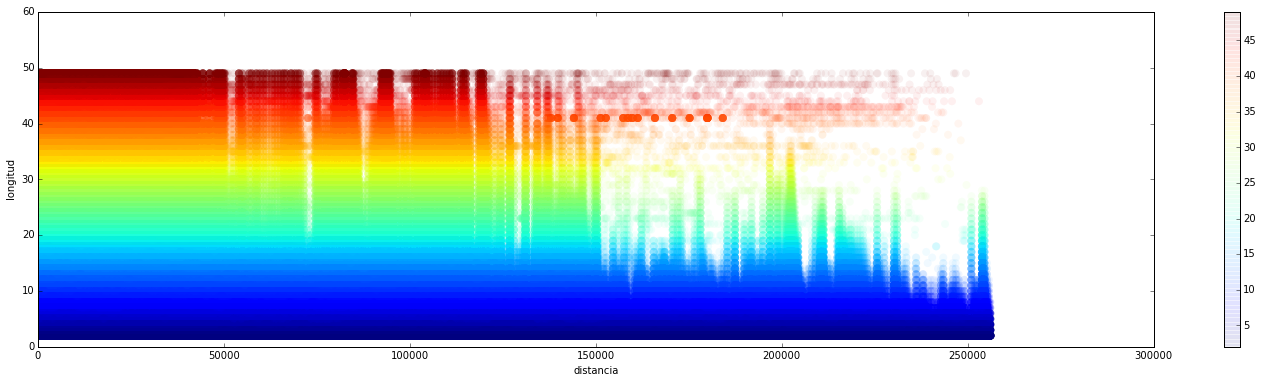

In [5]:
# 256.256 caracteres, 9.465 lineas
text4 = open("codigo.cpp")
dataTxt4 = countRepetitions(text4, 50)
graph(dataTxt4, 0.06)

## Metallica - all lyrics

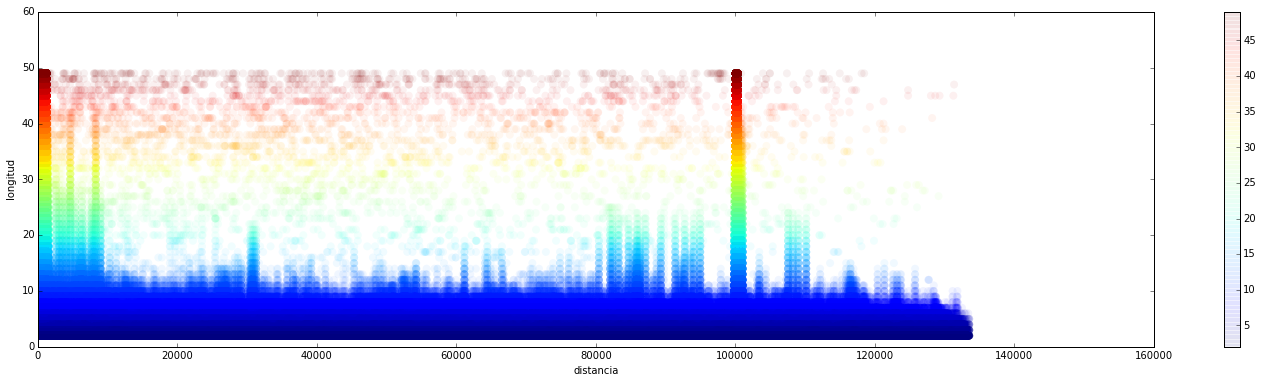

In [4]:
# 136.562 caracteres, 6.876 lineas
text5 = open("metallica.txt")
dataTxt5 = countRepetitions(text5, 50)
graph(dataTxt5, 0.06)

## Conclusiones

In [ ]:
# Conclusiones
#
# 1. Claramente hay distancias que son más probables que otras, sobre todo dependiendo del tipo  
#    de texto. Los textos literarios tienen solo unas pocas distancias que son más probables que otras
#    (por debajo de 100 posiciones), mientras que un arcivo de código tiene muchas más longitudes. 
#    Y las letras de canciones también tiene muchas repeticiones, es probable que sea por los 
#    estribillos y palabras que se usan con frecuencia en las letras. Pero habría que calcular
#    muchos más archivos para tener una idea más clara. 
#
# 2. Las longitudes por debajo de 10 caracteres tienen casi siempre muchas repeticiones. 
#    hay ciertas distancias que tienen longitudes caracteristicas que tienen varias repeticiones.
#  
# 3. Se podría usar las repeticiones por debajo de los 10 caracteres para comprimir toda esa
#    parte de los archivos. 
#
